# Explore exoS/exoU genes

This notebook specifically explores the core genes related to the two exoS (PAO1) and exoU (PA14) accessory genes. Specifically examining the core genes that are highly co-expressed with both exoS and exoU versus those that are specific to one gene or the other.

_P. aeruginosa_ uses a type III secretion system (T3SS) to promote development of severe disease, particularly in patients with impaired immune defenses. _P. aeruginosa_ uses a type III secretion system to inject toxic effector proteins into the cytoplasm of eukaryotic cells. ExoU, ExoS, and ExoT, three effector proteins secreted by this system. ExoU and ExoS are usually secreted by different strains.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC529154/

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import utils, paths, annotations

np.random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Get gene id for exoS and exoU
exoS_id = "PA3841"
exoU_id = "PA14_51530"

### Get relationship between exoS/U and all other genes

In [3]:
# Read in correlation for all genes
pao1_all_corr_filename = paths.PAO1_CORR_LOG_SPELL
pa14_all_corr_filename = paths.PA14_CORR_LOG_SPELL

pao1_all_corr = pd.read_csv(pao1_all_corr_filename, sep="\t", index_col=0, header=0)
pa14_all_corr = pd.read_csv(pa14_all_corr_filename, sep="\t", index_col=0, header=0)

In [4]:
# Get correlation between exoS/U and all other genes
exoS_all_corr = pao1_all_corr.loc[exoS_id].to_frame("corr to exoS")
exoU_all_corr = pa14_all_corr.loc[exoU_id].to_frame("corr to exoU")

In [5]:
print(exoS_all_corr.shape)
exoS_all_corr.head()

(5563, 1)


,corr to exoS
PA0001,-0.007137
PA0002,0.145528
PA0003,0.033906
PA0004,0.072060
PA0005,-0.004945


In [6]:
print(exoU_all_corr.shape)
exoU_all_corr.head()

(5891, 1)


,corr to exoU
PA14_55610,-0.053618
PA14_55600,-0.053680
PA14_55590,-0.023408
PA14_55580,-0.036778
PA14_55570,0.037214


### Add gene name

In [7]:
# Import gene metadata
pao1_gene_annot_filename = paths.GENE_PAO1_ANNOT
pa14_gene_annot_filename = paths.GENE_PA14_ANNOT

pao1_gene_annot = pd.read_csv(pao1_gene_annot_filename, index_col=0, header=0)
pa14_gene_annot = pd.read_csv(pa14_gene_annot_filename, index_col=0, header=0)

In [8]:
# Get df with gene ids as indices and gene names as a column
# Having the data in a df instead of a series will just allow me to do my merges that are in the notebook
pao1_gene_annot = pao1_gene_annot["Name"].to_frame("gene name")
pa14_gene_annot = pa14_gene_annot["Name"].to_frame("gene name")

In [9]:
# Add gene name annotation
exoS_all_corr = exoS_all_corr.merge(
    pao1_gene_annot, left_index=True, right_index=True, how="left"
)
exoU_all_corr = exoU_all_corr.merge(
    pa14_gene_annot, left_index=True, right_index=True, how="left"
)

In [10]:
print(exoS_all_corr.shape)
exoS_all_corr.head()

(5563, 2)


,corr to exoS,gene name
PA0001,-0.007137,dnaA
PA0002,0.145528,dnaN
PA0003,0.033906,recF
PA0004,0.072060,gyrB
PA0005,-0.004945,lptA


In [11]:
print(exoU_all_corr.shape)
exoU_all_corr.head()

(5891, 2)


,corr to exoU,gene name
PA14_55610,-0.053618,dnaE2
PA14_55600,-0.053680,NaN
PA14_55590,-0.023408,NaN
PA14_55580,-0.036778,nemO
PA14_55570,0.037214,NaN


### Select only core genes

In [12]:
# Get core genes
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

In [13]:
# Make a dataframe with gene ids
pao1_gene_ids = pd.DataFrame(data=[], index=pao1_all_corr.index)
pa14_gene_ids = pd.DataFrame(data=[], index=pa14_all_corr.index)

In [14]:
(
    pao1_arr,
    pa14_arr,
    pao1_core,
    pao1_acc,
    pa14_core,
    pa14_acc,
) = annotations.map_core_acc_annot(
    pao1_gene_ids,
    pa14_gene_ids,
    pao1_expression_filename,
    pa14_expression_filename,
    pao1_annot_filename,
    pa14_annot_filename,
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5361
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 530


In [15]:
exoS_core_corr = exoS_all_corr.loc[pao1_core]
exoU_core_corr = exoU_all_corr.loc[pa14_core]

In [16]:
print(exoS_core_corr.shape)
print(exoU_core_corr.shape)

(5361, 2)
(5361, 2)


In [17]:
exoS_core_corr.head()

,corr to exoS,gene name
PA5181,-0.112108,NaN
PA2781,-0.062942,NaN
PA3139,-0.035200,NaN
PA4005,-0.064951,NaN
PA2920,-0.012989,NaN


In [18]:
exoU_core_corr.head()

,corr to exoU,gene name
PA14_27230,0.092994,NaN
PA14_19450,-0.026314,NaN
PA14_40060,0.030865,NaN
PA14_06160,-0.060247,NaN
PA14_12910,0.003046,NaN


### Map and merge dataframes

In [19]:
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(pa14_annot_filename, "pa14")

In [20]:
pa14_gene_name_map = gene_mapping_pa14["PAO1_ID"].to_dict()

In [21]:
# Map PA14 gene ids to PAO1
exoU_core_corr = exoU_core_corr.rename(mapper=pa14_gene_name_map, axis=0)

In [22]:
print(exoU_core_corr.shape)
exoU_core_corr.head()

(5361, 2)


,corr to exoU,gene name
PA2849,0.092994,NaN
PA3453,-0.026314,NaN
PA1891,0.030865,NaN
PA0470,-0.060247,NaN
PA3939,0.003046,NaN


In [23]:
# Merge dataframes to get core genes related to exoS and exoU in one dataframe
exo_core_corr = exoS_core_corr.merge(
    exoU_core_corr, left_index=True, right_index=True, how="inner"
)

print(exo_core_corr.shape)
exo_core_corr.head()

(5349, 4)


,corr to exoS,gene name_x,corr to exoU,gene name_y
PA0001,-0.007137,dnaA,0.036646,dnaA
PA0002,0.145528,dnaN,0.129929,dnaN
PA0003,0.033906,recF,-0.010958,recF
PA0004,0.072060,gyrB,0.121186,gyrB
PA0005,-0.004945,lptA,0.010424,NaN


### Plot

In [24]:
# Core genes highly co-expressed with both exoS and exoU
exo_core_both = exo_core_corr[
    (exo_core_corr["corr to exoS"] > 0.4) & (exo_core_corr["corr to exoU"] > 0.2)
]
exo_core_both_ids = exo_core_both.index
print(exo_core_both.shape)
exo_core_both

(34, 4)


,corr to exoS,gene name_x,corr to exoU,gene name_y
PA0044,0.658689,exoT,0.511918,exoT
PA1690,0.400721,pscU,0.342725,pscU
PA1694,0.467328,pscQ,0.379913,pscQ
PA1695,0.540940,pscP,0.382713,pscP
PA1696,0.498835,pscO,0.375339,pscO
PA1697,0.558713,NaN,0.391809,pscN
PA1698,0.561618,popN,0.409986,popN
PA1699,0.557785,pcr1,0.378738,NaN
PA1700,0.549292,pcr2,0.423455,NaN
PA1701,0.501023,pcr3,0.398077,NaN


In [25]:
# Core genes co-expressed with exoS
exoS_core_only = exo_core_corr[
    (exo_core_corr["corr to exoS"] > 0.2) & (exo_core_corr["corr to exoU"] < 0)
]
exoS_core_only_ids = exoS_core_only.index
print(exoS_core_only.shape)
exoS_core_only

(35, 4)


,corr to exoS,gene name_x,corr to exoU,gene name_y
PA0099,0.272059,NaN,-0.191028,NaN
PA0574,0.390170,NaN,-0.200890,NaN
PA1312,0.396530,NaN,-0.244496,NaN
PA1313,0.455672,NaN,-0.261385,NaN
PA1314,0.351385,NaN,-0.138832,NaN
PA1315,0.360858,NaN,-0.302714,NaN
PA1316,0.265997,NaN,-0.241537,NaN
PA1931,0.236515,NaN,-0.166715,NaN
PA1932,0.267528,NaN,-0.175459,NaN
PA1933,0.221045,NaN,-0.151402,NaN


In [26]:
# Core genes co-expressed with exoU
exoU_core_only = exo_core_corr[
    (exo_core_corr["corr to exoS"] < 0.2) & (exo_core_corr["corr to exoU"] > 0.2)
]
exoU_core_only_ids = exoU_core_only.index
print(exoU_core_only.shape)
exoU_core_only

(22, 4)


,corr to exoS,gene name_x,corr to exoU,gene name_y
PA0620,-0.006078,NaN,0.230747,NaN
PA0958,0.107352,oprD,0.203628,oprD
PA0987,-0.147330,NaN,0.269327,NaN
PA0988,0.022322,NaN,0.389238,NaN
PA0990,0.041804,NaN,0.244100,NaN
PA0991,-0.068040,hptA,0.243322,NaN
PA0992,0.006808,cupC1,0.264947,cupC1
PA1887,-0.163429,NaN,0.422643,NaN
PA1888,-0.166161,NaN,0.450742,NaN
PA2189,0.007706,NaN,0.264228,NaN


In [27]:
# Add labels
exo_core_corr["label"] = ""
exo_core_corr.loc[exo_core_both_ids, "label"] = "both"
exo_core_corr.loc[exoS_core_only_ids, "label"] = "exoS only"
exo_core_corr.loc[exoU_core_only_ids, "label"] = "exoU only"

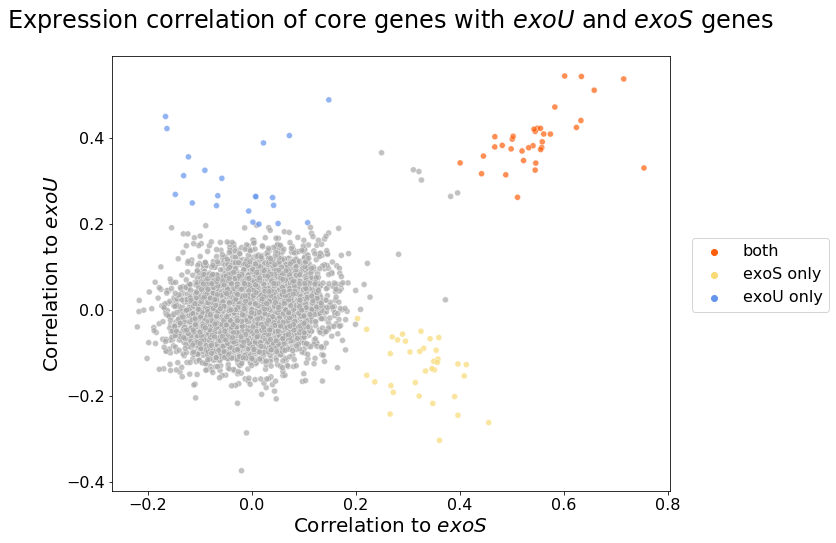

In [28]:
plt.figure(figsize=[10, 8])
fig_exo_corr = sns.scatterplot(
    data=exo_core_corr,
    x="corr to exoS",
    y="corr to exoU",
    alpha=0.7,
    hue="label",
    palette={
        "": "darkgrey",
        "both": "#fd5e0c",
        "exoS only": "#f9da76",
        "exoU only": "#6495ED",
    },
)

plt.ylabel(r"Correlation to $exoU$", fontsize=20)
plt.xlabel(R"Correlation to $exoS$", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(
    r"Expression correlation of core genes with $exoU$ and $exoS$ genes",
    fontsize=24,
    y=1.05,
)
plt.legend(bbox_to_anchor=(1.3, 0.6), fontsize=16)

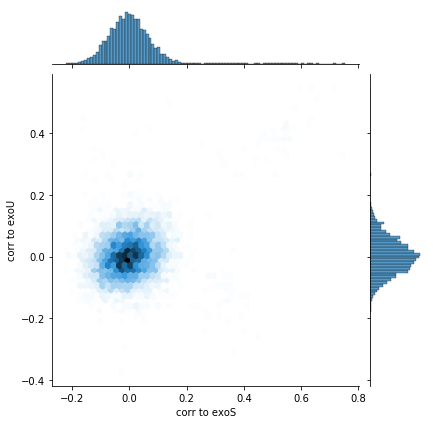

In [29]:
sns.jointplot(data=exo_core_corr, x="corr to exoS", y="corr to exoU", kind="hex")

In [30]:
# Save
exo_core_corr.to_csv("core_genes_related_to_exoSU.tsv", sep="\t")

fig_exo_corr.figure.savefig(
    "core_genes_correlated_with_exo.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

**Takeaway**
* Core genes that are highly co-expressed with both exoS and exoU are related to the T3SS secretion machinery
* Core genes highly co-expressed with exoS are TBD